In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
dataset_name = "kwf"
shifts = [1,6,144]
non_nan_percentage = 90
col_to_be_lagged = ["Wind speed (m/s)", 'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)', "power"]
val_ratio=0.2
scalers = [MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]
models_names = ["xgboost", "linreg", "xgboost_HPO"]

## Run models

In [4]:
models = run.pipeline(kwf2, models_names, dataset_name, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

[0]	validation_0-rmse:0.34084	validation_1-rmse:0.34476
[1]	validation_0-rmse:0.33759	validation_1-rmse:0.34148
[2]	validation_0-rmse:0.33436	validation_1-rmse:0.33823
[3]	validation_0-rmse:0.33118	validation_1-rmse:0.33501
[4]	validation_0-rmse:0.32802	validation_1-rmse:0.33183
[5]	validation_0-rmse:0.32490	validation_1-rmse:0.32868
[6]	validation_0-rmse:0.32181	validation_1-rmse:0.32556
[7]	validation_0-rmse:0.31876	validation_1-rmse:0.32248
[8]	validation_0-rmse:0.31573	validation_1-rmse:0.31942
[9]	validation_0-rmse:0.31274	validation_1-rmse:0.31641
[10]	validation_0-rmse:0.30978	validation_1-rmse:0.31342
[11]	validation_0-rmse:0.30685	validation_1-rmse:0.31046
[12]	validation_0-rmse:0.30395	validation_1-rmse:0.30754
[13]	validation_0-rmse:0.30108	validation_1-rmse:0.30464
[14]	validation_0-rmse:0.29824	validation_1-rmse:0.30178
[15]	validation_0-rmse:0.29543	validation_1-rmse:0.29894
[16]	validation_0-rmse:0.29265	validation_1-rmse:0.29614
[17]	validation_0-rmse:0.28990	validation

## Plot results

In [5]:
visualizations.plot_metrics("Kelmarsh",models)

| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.483 |          145.603 |  90.5201 |         91.5538 |
| Kelmarsh 1 hour horizon | 252.522 |          263.749 | 173.693  |        183.286  |
| Kelmarsh 1 day horizon  | 596.683 |          623.023 | 476.414  |        510.71   |


n_est = 1000, earlystopping=50
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.219 |          145.603 |  89.3621 |         91.5538 |


{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01}
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.483 |          145.603 |  90.5201 |         91.5538 |


40HP search search:
{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 1.0}
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 147.612 |          145.603 |  91.9744 |         91.5538 |


40 HP search:
{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 0.8}
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 1 day horizon  | 596.683 |          623.023 | 476.414  |        510.71   |

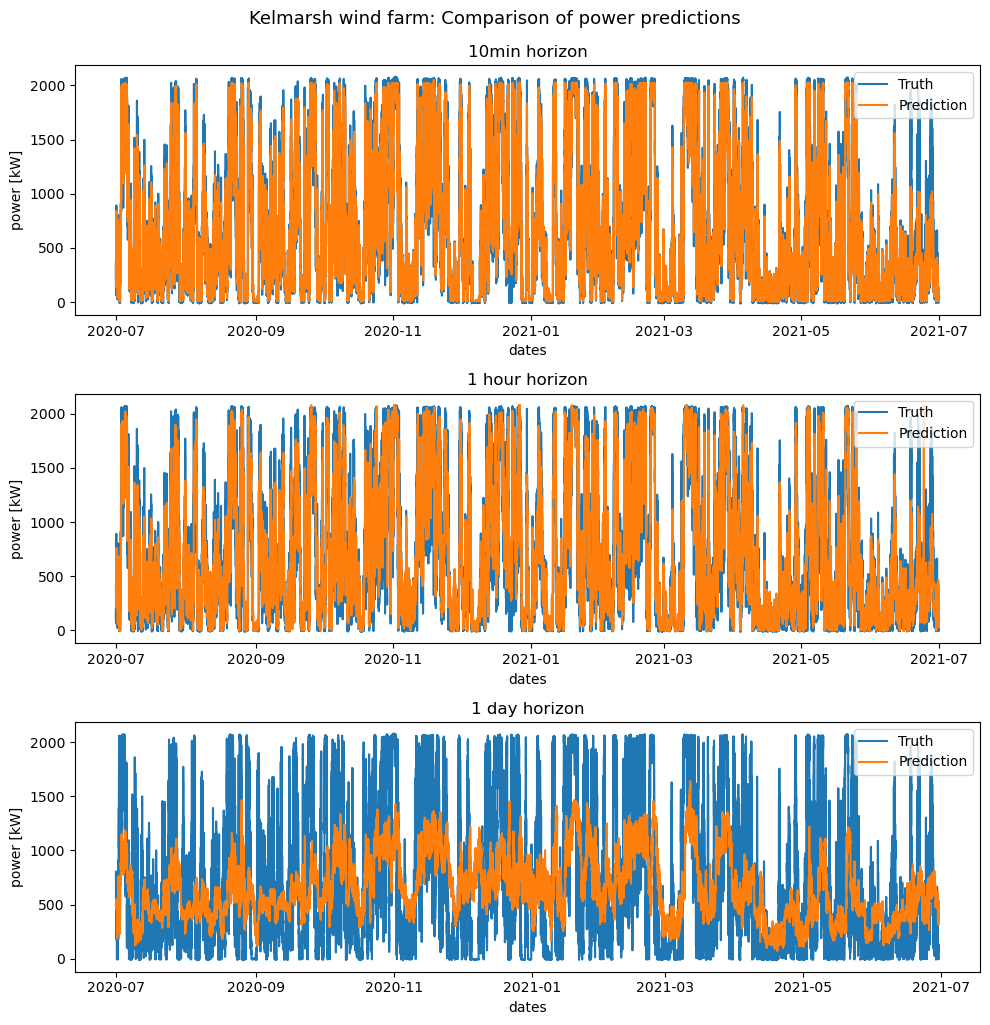

In [6]:
visualizations.plot_models("Kelmarsh",models)
